In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


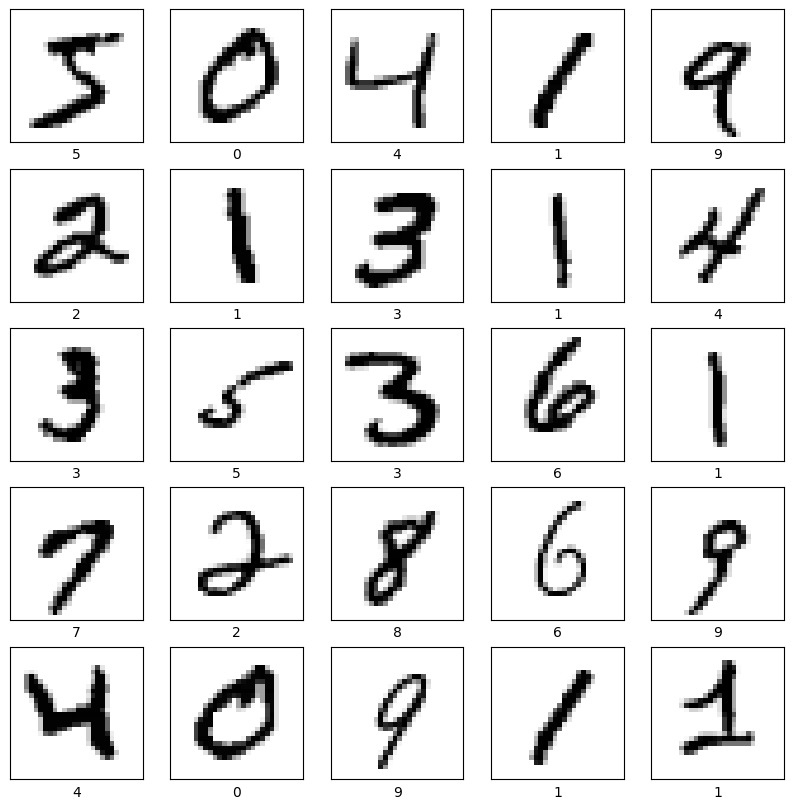

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))

model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3, 3),  activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
early_stopping_callback = EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True
)

In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, callbacks=[early_stopping_callback], validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9847 - loss: 0.0537 - val_accuracy: 0.9907 - val_loss: 0.0323
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9881 - loss: 0.0440 - val_accuracy: 0.9923 - val_loss: 0.0339
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9903 - loss: 0.0344 - val_accuracy: 0.9912 - val_loss: 0.0314
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9926 - val_loss: 0.0287
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9931 - loss: 0.0236 - val_accuracy: 0.9923 - val_loss: 0.0374
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9944 - val_loss: 0.0310
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9930 - loss: 0.0218 - val_accuracy: 0.9930 - val_loss: 0.0377
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9945 - loss: 0.0198 - val_accuracy: 0.

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9926 - loss: 0.0279
Test Loss: 0.022259369492530823
Test Accuracy: 0.9939000010490417


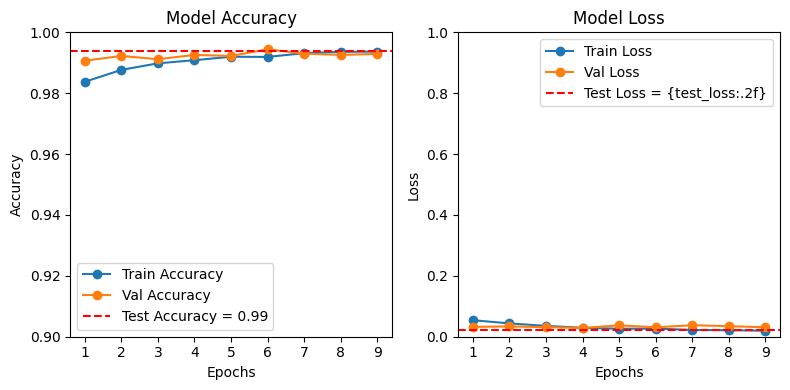

In [20]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

    epochs = range(1, len(history.history['accuracy']) + 1)

    # Accuracy subplot
    ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy', marker='o')
    ax1.plot(epochs, history.history['val_accuracy'], label='Val Accuracy', marker='o')
    ax1.axhline(y=test_acc, color='red', linestyle='--', label=f'Test Accuracy = {test_acc:.2f}')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_xticks(epochs)
    ax1.set_ylim(0.90, 1.0)
    ax1.legend()

    # Loss subplot
    ax2.plot(epochs, history.history['loss'], label='Train Loss', marker='o')
    ax2.plot(epochs, history.history['val_loss'], label='Val Loss', marker='o')
    ax2.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss = {test_loss:.2f}')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_xticks(epochs)
    ax2.set_ylim(0.0, 1.0)
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)